### Aplicación de PCA y K-MEANS a la **CRISIS ECONÓMICA de 2008**

#### **Contexto**
La crisis económica de 2008 (iniciada oficialmente en 2007), fue una de las peores crisis financieras desde la Gran Depresión. Se originó en Estados Unidos con el colapso del mercado hipotecario subprime y rápidamente se extendió al resto del mundo, afectando sistemas financieros y economías globales. En 2008, eventos como la quiebra de Lehman Brothers (septiembre) y los rescates financieros masivos definieron el punto álgido de la crisis. Sin embargo, sus efectos se sintieron de forma prolongada en economías de todo el mundo.

---

#### **Impacto en Programas de Gobierno**
- **Economía**: 
  - Aumento de políticas de regulación financiera.
  - Rescates bancarios y medidas de estímulo fiscal.
- **Bienestar Social**: 
  - Propuestas para reforzar sistemas de protección social.
  - Enfoque en combatir el desempleo.
- **Globalización y Desigualdad**: 
  - Debate sobre la dependencia del sistema económico globalizado.
  - Propuestas para reducir desigualdades.
- **Tono Político**: 
  - Mayor enfoque en el discurso anti-élite y populismo como reacción a los rescates de instituciones financieras.
- **Regulaciones**: 
  - Incremento de regulaciones para anticipar problemas futuros en los sistemas financieros.

---


#### Variables 'per' elegidas para representar el evento de la crisis

- **per401**: 
  - Free Market Economy (Dominio: Economía)  
    <img src="../assets/per401_crisis.png" alt="Descripción per401" style="width:600px;">

- **per403**: 
  - Market Regulation  
    <img src="../assets/per403_crisis.png" alt="Descripción per403" style="width:600px;">

- **per503**: 
  - Equality Positive  
    <img src="../assets/per503_crisis.png" alt="Descripción per503" style="width:600px;">

- **per504**: 
  - Welfare State Expansion  
    <img src="../assets/per504_crisis.png" alt="Descripción per504" style="width:600px;">


#### Cargamos librerías

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


#### Cargamos la matriz de aspectos y la descripción de las variables 'per'

In [2]:
# Crear el DataFrame 'df_aspectos' con los aspectos y las variables asociadas
data_aspectos = {
    'aspecto': ['CRISIS_FINANCIERA_2008'],
    'var_1': ['per401'],
    'var_2': ['per403'],
    'var_3': ['per503'],  # None indica que no hay una tercera variable para el aspecto
    'var_4': ['per504']  
}
df_aspectos = pd.DataFrame(data_aspectos)
display(df_aspectos)
# cargar Analytical_Data
df_AD = pd.read_excel('data/Analytical_Data.xlsx')
display(df_AD.head())

,aspecto,var_1,var_2,var_3,var_4
0,CRISIS_FINANCIERA_2008,per401,per403,per503,per504


,Dominio,Nombre_Dominio,Variable_per,Detalle_Dominio
0,Domain_1,External Relations,per101,Foreign Special Relationships: Positive
1,Domain_1,External Relations,per102,Foreign Special Relationships: Negative
2,Domain_1,External Relations,per103,Anti-Imperialism
3,Domain_1,External Relations,per104,Military: Positive
4,Domain_1,External Relations,per105,Military: Negative


In [3]:
detalle_dominio_values = df_AD['Detalle_Dominio'].unique().tolist()
print(detalle_dominio_values)

['Foreign Special Relationships: Positive', 'Foreign Special Relationships: Negative', 'Anti-Imperialism', 'Military: Positive', 'Military: Negative', 'Peace', 'Internationalism: Positive', 'European Community/Union: Positive', 'Internationalism: Negative', 'European Community/Union: Negative', 'Freedom and Human Rights', 'Democracy', 'Constitutionalism: Positive', 'Constitutionalism: Negative', 'Decentralization', 'Centralisation', 'Governmental and Administrative Efficiency', 'Political Corruption', 'Political Authority', 'Free Market Economy', 'Incentives: Positive', 'Market Regulation', 'Economic Planning', 'Corporatism/Mixed Economy', 'Protectionism: Positive', 'Protectionism: Negative', 'Economic Goals', 'Keynesian Demand Management', 'Economic Growth: Positive', 'Technology and Infrastructure: Positive', 'Controlled Economy', 'Nationalisation', 'Economic Orthodoxy', 'Marxist Analysis', 'Anti-Growth Economy: Positive', 'Environmental Protection', 'Culture: Positive', 'Equality: P

#### Carga del dataset y definición del périodo en análisis ('desde' y 'hasta')

In [4]:
# Cargar el dataset principal
file_path = './data/MP_Dataset_KMeans.xlsx'
df = pd.read_excel(file_path)

# Filtrar el DataFrame según las variables del aspecto seleccionado y el período
aspecto_filtro = 'CRISIS_FINANCIERA_2008'
desde = 2008
hasta = 2012

variables = df_aspectos[df_aspectos['aspecto'] == aspecto_filtro][['var_1', 'var_2', 'var_3', 'var_4']].dropna().values.flatten()

#### 1.Filtrar y Normalizar datos

In [5]:
# Filtrar el DataFrame para las variables del aspecto, y normalizar si es necesario
df_filtered = df[(df['agno'] >= desde) & (df['agno'] <= hasta)][['countryname', 'agno'] + list(variables)].copy()
df_filtered.dropna(inplace=True)

# Normalizar las columnas per
columns_per = variables
df_filtered['per_sum'] = df_filtered[columns_per].sum(axis=1)
rows_to_normalize = df_filtered['per_sum'] != 1.0
df_filtered.loc[rows_to_normalize, columns_per] = df_filtered.loc[rows_to_normalize, columns_per].div(
    df_filtered.loc[rows_to_normalize, 'per_sum'], axis=0
)
df_filtered.drop(columns=['per_sum'], inplace=True)

# Verificar que las variables per sumen 1
assert df_filtered[columns_per].sum(axis=1).round(6).eq(1).all(), "Error: las variables per no suman 1."


#### 2.Realizar PCA

In [6]:
# Seleccionar sólo las columnas numéricas (per) para PCA
numeric_data = df_filtered[columns_per]

# Ejecutar PCA
pca = PCA(n_components=3)
pca_components = pca.fit_transform(numeric_data)

# Crear un DataFrame con las componentes principales
pca_df = pd.DataFrame(pca_components, columns=['PC1', 'PC2', 'PC3'])

# Combinar con las columnas categóricas
df_pca = pd.concat([df_filtered[['countryname', 'agno']].reset_index(drop=True), pca_df.reset_index(drop=True)], axis=1)

# Verificar el resultado
# print(df_pca.info())
# print(df_pca.head(10))


#### Varianza explicada por cada componente de PCA

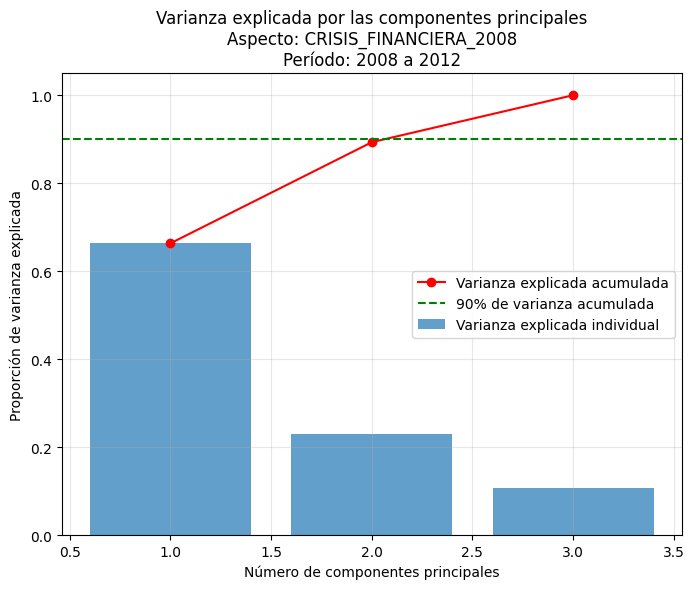

Componente 1: 0.6635 (0.6635 acumulado)
Componente 2: 0.2297 (0.8932 acumulado)
Componente 3: 0.1068 (1.0000 acumulado)


In [7]:
# Varianza explicada por cada componente principal
explained_variance_ratio = pca.explained_variance_ratio_

# Varianza acumulada
explained_variance_cumulative = np.cumsum(explained_variance_ratio)

# Visualización de la varianza explicada
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7, label='Varianza explicada individual')
plt.plot(range(1, len(explained_variance_cumulative) + 1), explained_variance_cumulative, marker='o', color='red', label='Varianza explicada acumulada')
plt.title(f"Varianza explicada por las componentes principales\nAspecto: {aspecto_filtro}\nPeríodo: {desde} a {hasta}")
plt.xlabel('Número de componentes principales')
plt.ylabel('Proporción de varianza explicada')
plt.axhline(y=0.9, color='green', linestyle='--', label='90% de varianza acumulada')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# Imprimir la varianza explicada
for i, ratio in enumerate(explained_variance_ratio, start=1):
    print(f"Componente {i}: {ratio:.4f} ({explained_variance_cumulative[i-1]:.4f} acumulado)")


In [8]:
# Calcular las cargas de las variables originales en las componentes principales
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(pca.n_components_)],
    index=columns_per
)
# Mostrar las cargas
display(loadings)


,PC1,PC2,PC3
per401,0.123975,-0.047406,0.855794
per403,0.189951,-0.763492,-0.361937
per503,0.513586,0.612879,-0.332578
per504,-0.827513,0.198019,-0.161279


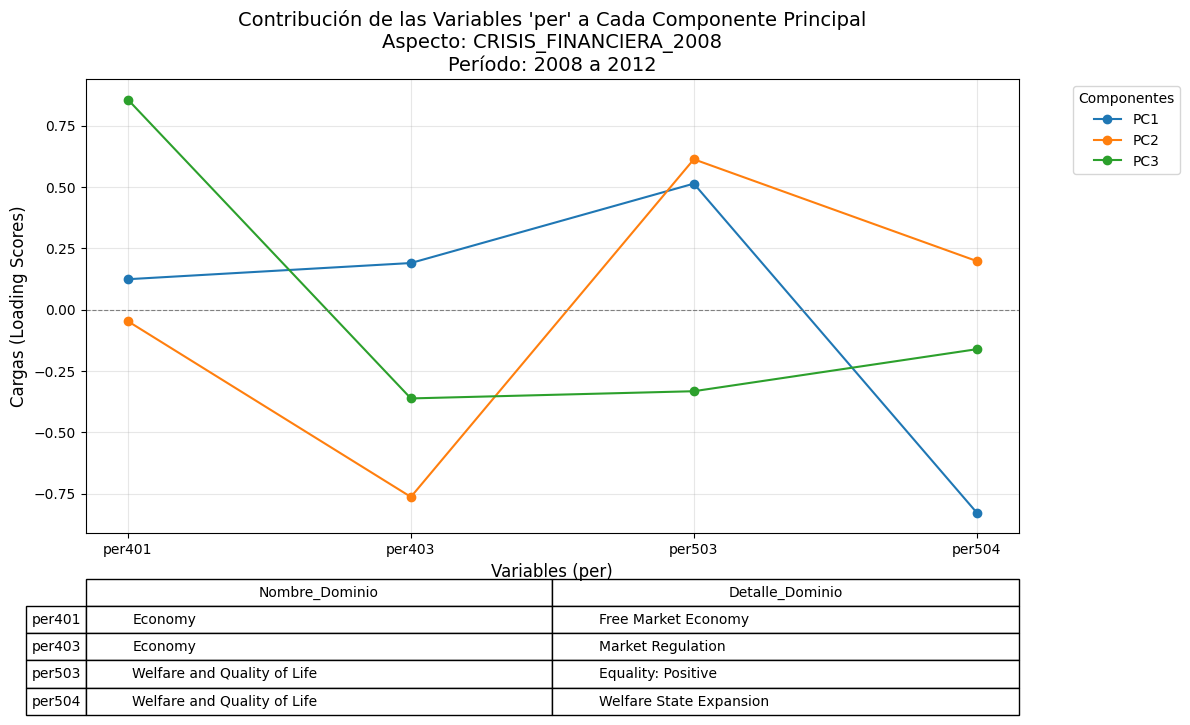

In [9]:
# Calcular las cargas (loading scores)
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(pca.n_components_)],
    index=columns_per
)

# Obtener información de las variables del aspecto desde df_AD
variables_info = df_AD[df_AD['Variable_per'].isin(columns_per)][['Variable_per', 'Nombre_Dominio', 'Detalle_Dominio']]
variables_info = variables_info.set_index('Variable_per').reindex(columns_per)

# Graficar las cargas para cada componente principal
fig, ax = plt.subplots(figsize=(12, 8))

for i, col in enumerate(loadings.columns):
    ax.plot(loadings.index, loadings[col], marker='o', label=col)

# Configuración del gráfico
ax.set_title(f"Contribución de las Variables 'per' a Cada Componente Principal\nAspecto: {aspecto_filtro}\nPeríodo: {desde} a {hasta}", fontsize=14)
ax.set_xlabel('Variables (per)', fontsize=12)
ax.set_ylabel('Cargas (Loading Scores)', fontsize=12)
ax.set_xticks(range(len(loadings.index)))
ax.set_xticklabels(loadings.index, rotation=0, ha='center')
ax.axhline(0, color='gray', linestyle='--', linewidth=0.8)
ax.legend(title='Componentes', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(alpha=0.3)

# Crear la tabla con la información adicional
from matplotlib.table import Table

table_data = variables_info[['Nombre_Dominio', 'Detalle_Dominio']].values
table_col_labels = ['Nombre_Dominio', 'Detalle_Dominio']
table_row_labels = variables_info.index

# Agregar la tabla al gráfico
table = plt.table(cellText=table_data,
                  colLabels=table_col_labels,
                  rowLabels=table_row_labels,
                  cellLoc='left',
                  loc='bottom',
                  bbox=[0.0, -0.4, 1.0, 0.3])  # Ajustar posición y tamaño

# Ajustar diseño
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.0, 1.2)

plt.tight_layout()
plt.show()


In [10]:
# Mostrar los loading scores como una tabla
print("Loading Scores (Contribución de cada variable a las componentes principales):")
display(loadings.round(4))  # Limitar a 4 decimales para mayor claridad

Loading Scores (Contribución de cada variable a las componentes principales):


,PC1,PC2,PC3
per401,0.1240,-0.0474,0.8558
per403,0.1900,-0.7635,-0.3619
per503,0.5136,0.6129,-0.3326
per504,-0.8275,0.1980,-0.1613


#### 3.Elbow + K-MEANS
* Con K-MEANS vemos si es que los componentes principales forman clusteres
* Para saber el número óptimo de clusteres en un método de clasificación como K_MEANS, usamos el "elbow method". Este método:
* * Calcula los WCSS (Within-Cluster Sum of Squares): Mide la suma de las distancias cuadradas entre los puntos de datos y el centroide de su clúster.
* * Se calcula WCSS para diferentes números de clústeres (kk)
* * Al graficar kk contra WCSS, la curva normalmente muestra una pendiente pronunciada que luego se estabiliza.
* * El "codo" es el punto donde la reducción en WCSS deja de ser significativa, indicando que agregar más clústeres no mejora sustancialmente la compactación

/Applications/anaconda3/envs/DatascienceUDD/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Applications/anaconda3/envs/DatascienceUDD/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Applications/anaconda3/envs/DatascienceUDD/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Applications/anaconda3/envs/DatascienceUDD/lib/python3.8/site-packages/sklearn/cluster/

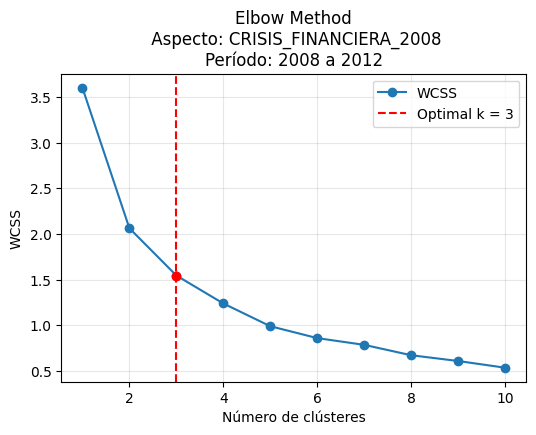

El número óptimo de clústeres (elbow method) es: 3


In [11]:
from kneed import KneeLocator

# Usar los datos normalizados de 'numeric_data' para calcular WCSS
data_scaled = numeric_data  # Asegúrate de que sea el conjunto de datos numéricos normalizados

# Calcular WCSS para determinar el número óptimo de clústeres
max_k = 10
wcss = []
for k in range(1, max_k + 1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

# Encontrar el codo automáticamente
kl = KneeLocator(range(1, max_k + 1), wcss, curve="convex", direction="decreasing")
optimal_k = kl.knee

# Graficar el método del codo
plt.figure(figsize=(6, 4))
plt.plot(range(1, max_k + 1), wcss, marker='o', label="WCSS")
plt.axvline(optimal_k, color='red', linestyle='--', label=f'Optimal k = {optimal_k}')
plt.scatter(optimal_k, wcss[optimal_k - 1], color='red', zorder=5)  # Punto del codo
plt.title(f"Elbow Method\n Aspecto: {aspecto_filtro}\nPeríodo: {desde} a {hasta}")
plt.xlabel('Número de clústeres')
plt.ylabel('WCSS')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

print(f"El número óptimo de clústeres (elbow method) es: {optimal_k}")


/Applications/anaconda3/envs/DatascienceUDD/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


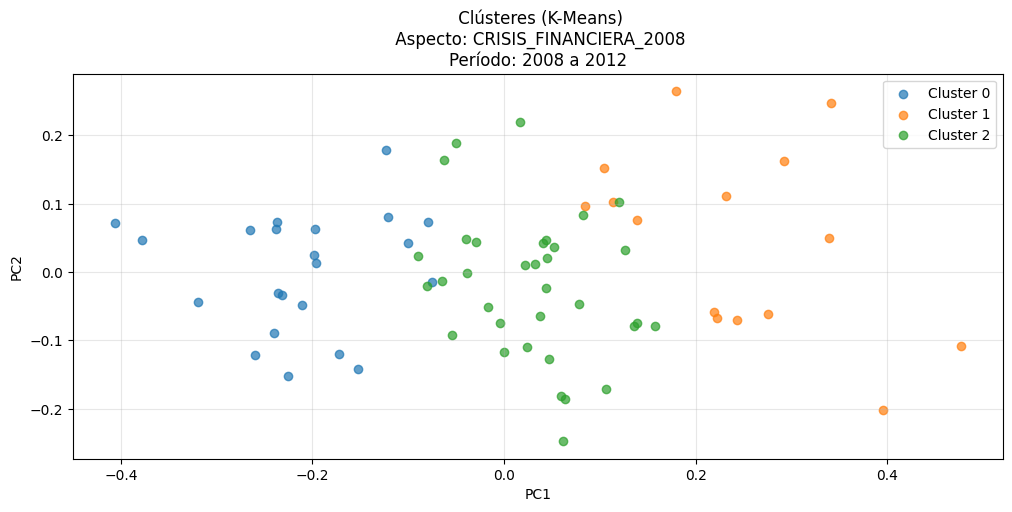

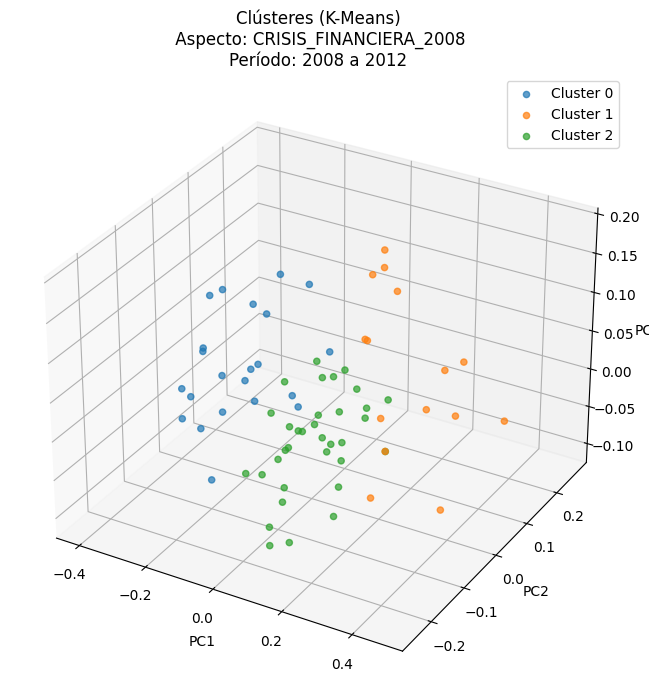

In [12]:
from mpl_toolkits.mplot3d import Axes3D
# Aplicar K-Means
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df_pca['cluster'] = kmeans.fit_predict(df_pca[['PC1', 'PC2', 'PC3']])

# Visualizar clústeres en 2D
plt.figure(figsize=(12, 5))
for cluster in range(optimal_k):
    cluster_data = df_pca[df_pca['cluster'] == cluster]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster}', alpha=0.7)

plt.title(f" Clústeres (K-Means)\n Aspecto: {aspecto_filtro}\nPeríodo: {desde} a {hasta}")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# Visualizar clústeres en 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
for cluster in range(optimal_k):
    cluster_data = df_pca[df_pca['cluster'] == cluster]
    ax.scatter(cluster_data['PC1'], cluster_data['PC2'], cluster_data['PC3'], label=f'Cluster {cluster}', alpha=0.7)

ax.set_title(f"Clústeres (K-Means)\n Aspecto: {aspecto_filtro}\nPeríodo: {desde} a {hasta}")
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.legend()
plt.show()


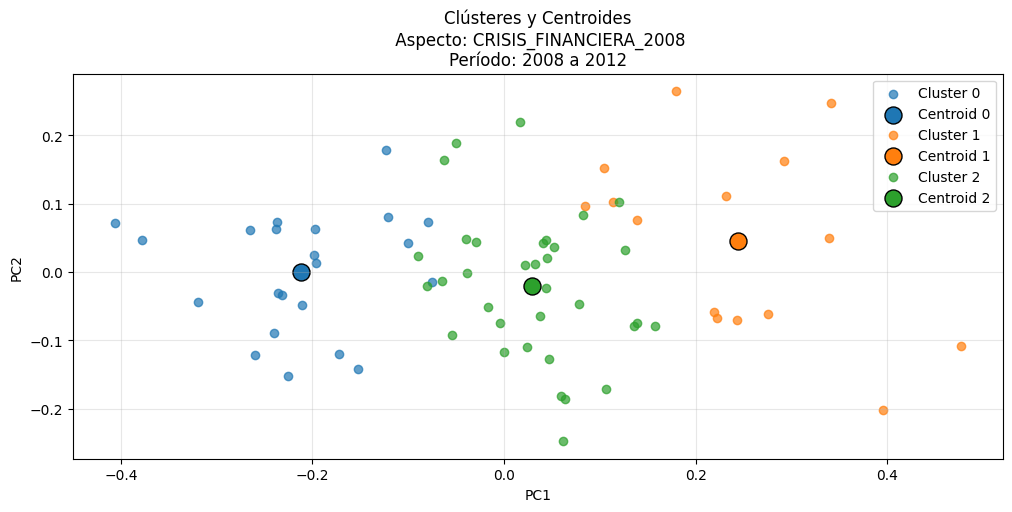

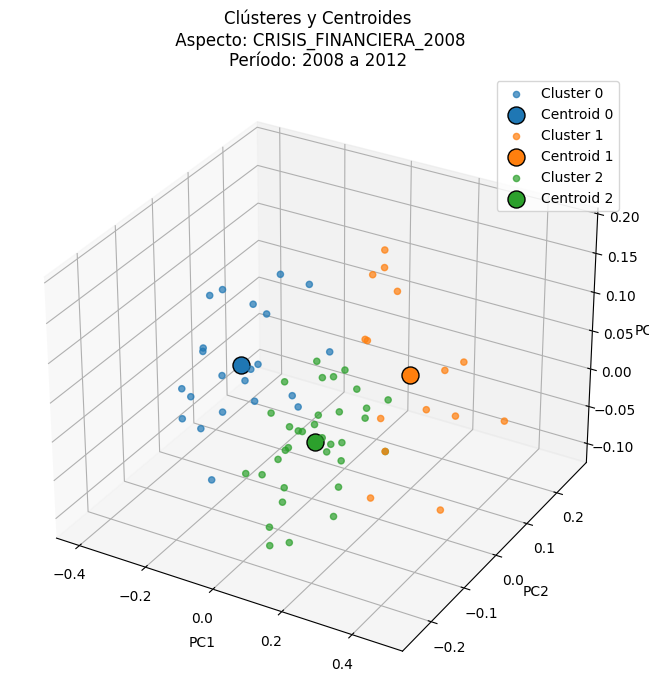

Coordenadas de los centroides:


,PC1,PC2,PC3
0,-0.211866,-0.000225,0.023658
1,0.243746,0.046048,0.051620
2,0.029555,-0.020170,-0.038081


In [13]:
import matplotlib.pyplot as plt
import pandas as pd

# Obtener los centroides del modelo K-Means
centroids = kmeans.cluster_centers_

# Crear un DataFrame para los centroides con las etiquetas de los componentes principales
centroids_df = pd.DataFrame(centroids, columns=['PC1', 'PC2', 'PC3'])

# Crear una paleta de colores para los clústeres
colors = plt.cm.tab10(range(optimal_k))

# Gráfico en 2D
plt.figure(figsize=(12, 5))
for cluster in range(optimal_k):
    cluster_data = df_pca[df_pca['cluster'] == cluster]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster}', alpha=0.7, color=colors[cluster])
    
    # Añadir los centroides con el color correspondiente
    plt.scatter(centroids[cluster, 0], centroids[cluster, 1], color=colors[cluster], edgecolor='black', s=150, label=f'Centroid {cluster}')

plt.title(f"Clústeres y Centroides\n Aspecto: {aspecto_filtro}\nPeríodo: {desde} a {hasta}")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# Gráfico en 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
for cluster in range(optimal_k):
    cluster_data = df_pca[df_pca['cluster'] == cluster]
    ax.scatter(cluster_data['PC1'], cluster_data['PC2'], cluster_data['PC3'], label=f'Cluster {cluster}', alpha=0.7, color=colors[cluster])

    # Añadir los centroides con el color correspondiente
    ax.scatter(centroids[cluster, 0], centroids[cluster, 1], centroids[cluster, 2], color=colors[cluster], edgecolor='black', s=150, label=f'Centroid {cluster}')

ax.set_title(f"Clústeres y Centroides\n Aspecto: {aspecto_filtro}\nPeríodo: {desde} a {hasta}")
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.legend()
plt.show()

# Mostrar las coordenadas de los centroides
print("Coordenadas de los centroides:")
display(centroids_df)


#### 4.Visualicemos qué países-programas hay en cada cluster

In [14]:
# Explorar los países y períodos en cada clúster
for cluster in range(optimal_k):
    cluster_data = df_pca[df_pca['cluster'] == cluster]
    print(f"\nCluster {cluster}:")
    print(f"Total Programas: {len(cluster_data)}")
    print("Países y años:")
    display(cluster_data)
    # for country, group in cluster_data.groupby('countryname'):
    #     years = group['agno'].tolist()
    #     print(f"- {country}: {len(years)} programas ({', '.join(map(str, years))})")



Cluster 0:
Total Programas: 22
Países y años:


,countryname,agno,PC1,PC2,PC3,cluster
1,Armenia,2012,-0.319399,-0.043310,-0.014961,0
2,Australia,2010,-0.405893,0.072120,-0.009433,0
5,Bolivia,2009,-0.197924,0.025545,-0.031825,0
6,Bosnia-Herzegovina,2010,-0.377567,0.047495,0.007833,0
7,Brazil,2010,-0.121089,0.079674,-0.050425,0
16,Denmark,2011,-0.079095,0.072870,0.117888,0
19,Estonia,2011,-0.236795,0.073615,-0.005996,0
28,Italy,2008,-0.172147,-0.119452,0.161448,0
29,Japan,2009,-0.236121,-0.031090,-0.029275,0
30,Japan,2012,-0.074682,-0.014965,0.162282,0



Cluster 1:
Total Programas: 15
Países y años:


,countryname,agno,PC1,PC2,PC3,cluster
0,Argentina,2011,0.179910,0.264257,-0.095397,1
3,Austria,2008,0.341763,0.246414,-0.074099,1
14,Cyprus,2011,0.242724,-0.070127,-0.062670,1
18,Ecuador,2009,0.231752,0.111070,-0.020474,1
22,Georgia,2008,0.084195,0.096191,0.141336,1
24,Germany,2009,0.476632,-0.107682,-0.030338,1
25,Greece,2012,0.104618,0.151324,0.102917,1
27,Iceland,2009,0.291787,0.162617,0.030013,1
40,Netherlands,2010,0.339345,0.049309,0.067938,1
41,Netherlands,2012,0.221812,-0.067843,0.136110,1



Cluster 2:
Total Programas: 34
Países y años:


,countryname,agno,PC1,PC2,PC3,cluster
4,Belgium,2010,0.135935,-0.079529,-0.003392,2
8,Bulgaria,2009,-0.003712,-0.074122,0.056664,2
9,Canada,2008,0.106110,-0.170728,-0.098226,2
10,Canada,2011,-0.065132,-0.013768,-0.064225,2
11,Chile,2009,0.138745,-0.074035,-0.099812,2
12,Colombia,2010,-0.040083,0.048449,-0.051244,2
13,Costa Rica,2010,0.032710,0.012230,-0.063699,2
15,Czech Republic,2010,-0.000320,-0.116458,0.033367,2
17,Dominican Republic,2012,0.120047,0.102650,-0.087636,2
20,Finland,2011,-0.038207,-0.001718,-0.039744,2


In [15]:
df_pca

,countryname,agno,PC1,PC2,PC3,cluster
0,Argentina,2011,0.179910,0.264257,-0.095397,1
1,Armenia,2012,-0.319399,-0.043310,-0.014961,0
2,Australia,2010,-0.405893,0.072120,-0.009433,0
3,Austria,2008,0.341763,0.246414,-0.074099,1
4,Belgium,2010,0.135935,-0.079529,-0.003392,2
...,...,...,...,...,...,...
66,Turkey,2011,-0.237942,0.062635,0.076936,0
67,Ukraine,2012,0.052565,0.035914,-0.082413,2
68,United Kingdom,2010,-0.017127,-0.051570,-0.039284,2
69,United States,2008,0.275300,-0.061467,-0.001213,1


In [16]:
cluster_0_countries = df_pca[df_pca['cluster'] == 2]['countryname'].tolist()
print(cluster_0_countries)

['Belgium', 'Bulgaria', 'Canada', 'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Czech Republic', 'Dominican Republic', 'Finland', 'France', 'Georgia', 'Hungary', 'Latvia', 'Latvia', 'Lithuania', 'Lithuania', 'Luxembourg', 'Montenegro', 'New Zealand', 'Panama', 'Portugal', 'Portugal', 'Romania', 'Serbia', 'Serbia', 'Slovakia', 'Slovakia', 'South Africa', 'Spain', 'Spain', 'Sweden', 'Ukraine', 'United Kingdom']


#### **ANÁLISIS DEL CLUSTER 0 en el período 2008 a 2012**
* **Países en el cluster 1:** ['Armenia', 'Australia', 'Bolivia', 'Bosnia-Herzegovina', 'Brazil', 'Denmark', 'Estonia', 'Italy', 'Japan', 'Japan', 'Moldova', 'Moldova', 'Montenegro', 'North Macedonia', 'Norway', 'Peru', 'Poland', 'Romania', 'Russia', 'South Korea', 'South Korea', 'Turkey']

* Los siguientes factores destacan como elementos comunes:

#### 1. **Impacto Moderado o Indirecto de la Crisis**  
Aunque la crisis financiera global fue severa, algunos países experimentaron impactos menos directos debido a:
   - **Baja exposición al sistema financiero estadounidense**: Países como **Armenia, Bolivia**, o **Moldova** tienen economías menos globalizadas, por lo que sus sistemas financieros eran menos vulnerables al contagio.
   - **Regulaciones financieras previas fuertes**: Países como **Norway** o **South Korea** ya contaban con marcos regulatorios sólidos que mitigaron los efectos directos.

#### 2. **Dependencia de Recursos Naturales y Exportaciones**
   - **Brasil, Australia, Norway**, y **Russia** tienen economías altamente dependientes de la exportación de recursos naturales (energía, minerales, o petróleo).  
   - En este período, China impulsó la demanda de materias primas, lo que mantuvo estables las economías de países exportadores.

#### 3. **Medidas de Resiliencia**
   - **Políticas fiscales activas**: Varios países implementaron medidas fiscales significativas para proteger sus economías. Por ejemplo:
      - **South Korea** lanzó un programa de estímulo masivo.
      - **Norway** usó su fondo soberano de petróleo para estabilizar la economía.
   - **Reformas estructurales previas**: Algunos países, como **Poland**, entraron al período con fundamentos económicos más sólidos, evitando las peores consecuencias.

#### 4. **Geopolítica y Aislamiento Relativo**
   - **Balkanización reciente**: Países como **Bosnia-Herzegovina**, **North Macedonia**, y **Montenegro** estaban en etapas de reconstrucción tras la fragmentación de Yugoslavia, con menor integración en mercados financieros globales.
   - **Distancia económica**: Países como **Bolivia** y **Peru** estuvieron parcialmente protegidos debido a economías más cerradas y menor dependencia del sistema bancario global.

#### 5. **Recuperación Temprana**
   - Países asiáticos como **South Korea** y **Japan** implementaron políticas efectivas para una recuperación más rápida de la crisis, aprendiendo de crisis previas (como la asiática de 1997-1998).

#### **Conclusión:** 
El **Cluster 0** parece agrupar países con un **impacto moderado** o **indirecto** de la crisis económica global. Comparten características como economías menos expuestas, sistemas regulatorios robustos, y, en algunos casos, beneficios por su dependencia de recursos naturales o aislamiento relativo del sistema financiero globalizado. Esto explicaría por qué los programas de gobierno de estos países pudieron priorizar enfoques diferentes a los de economías más afectadas.

---

#### **ANÁLISIS DEL CLUSTER 1 en el período 2008 a 2012**
* **Países en el cluster 1:** ['Argentina', 'Austria', 'Cyprus', 'Ecuador', 'Georgia', 'Germany', 'Greece', 'Iceland', 'Netherlands', 'Netherlands', 'New Zealand', 'Slovenia', 'Slovenia', 'United States', 'United States']

* Los siguientes factores destacan como elementos comunes:

#### 1. **Impacto Directo y Severidad de la Crisis**  
Estos países fueron afectados de manera más significativa por la crisis debido a su **mayor integración en el sistema financiero global** o por **fragilidades económicas preexistentes**:
   - **Estados Unidos**: Epicentro de la crisis por el colapso del mercado hipotecario subprime y la quiebra de instituciones financieras como Lehman Brothers.
   - **Greece, Iceland, Cyprus**: Profundas crisis de deuda soberana o colapsos bancarios directos.
   - **Netherlands, Austria, Germany**: Aunque tuvieron sistemas financieros robustos, experimentaron desaceleración económica por la contracción global.

#### 2. **Crisis de Deuda Soberana y Rescates Financieros**
   - **Europa**:
      - **Greece**: Crisis de deuda soberana que requirió múltiples rescates de la Unión Europea y el Fondo Monetario Internacional (FMI). Grecia se convirtió en el epicentro de la crisis de deuda en Europa.
      - **Cyprus**: Crisis bancaria alimentada por vínculos con Grecia.
      - **Iceland**: Colapso completo del sistema bancario y nacionalización de bancos.
   - **Argentina y Ecuador**: Historial reciente de incumplimientos de deuda soberana; las políticas gubernamentales para evitar un contagio global acentuaron su aislamiento.

#### 3. **Medidas de Recuperación Drásticas**
   - **Políticas de austeridad y rescates financieros**:
      - Países europeos como **Greece, Cyprus, Germany, Netherlands** implementaron programas de austeridad y reformas estructurales a cambio de rescates.
      - **United States** lanzó paquetes de estímulo fiscal y rescates bancarios masivos (TARP - Programa de Alivio para Activos en Problemas).
   - **Nacionalización de sectores clave**:
      - **Iceland** nacionalizó bancos colapsados.
      - **Argentina y Ecuador** se distanciaron del sistema financiero global, reforzando el control estatal sobre sectores económicos.

#### 4. **Desempleo y Desigualdad**
   - Países como **Greece, Spain**, y **United States** experimentaron picos históricos de desempleo.
   - En **Argentina y Ecuador**, la crisis exacerbó problemas estructurales de desigualdad, lo que llevó a un cambio hacia políticas más populistas y proteccionistas.

#### 5. **Reestructuración Económica y Financiera**
   - **Iceland**: Reestructuración completa de su sistema bancario y rechazo de deudas internacionales, marcando un camino diferente de recuperación.
   - **United States**: Cambios regulatorios significativos con la Ley Dodd-Frank para prevenir futuras crisis financieras.
   - **Ecuador**: Redefinición de sus relaciones de deuda internacional, enfocándose en diversificar la economía.

#### 6. **Enfoques Diferentes de los Programas de Gobierno**
   - **Intervencionismo estatal**: Países como **Argentina, Ecuador, Greece**, y **Iceland** vieron un aumento en propuestas para aumentar el control estatal sobre sectores estratégicos.
   - **Regulación financiera**: Países desarrollados como **Germany, Netherlands**, y **United States** priorizaron regulaciones más estrictas para prevenir nuevas crisis.
   - **Protección social**: En países como **Greece y Cyprus**, el colapso económico llevó a una discusión sobre cómo proteger a los ciudadanos frente a la austeridad.

#### **Conclusión:**
Este grupo de países experimentó un **impacto directo y severo de la crisis económica global**, pero con diferentes matices:
- Algunos enfrentaron **crisis de deuda soberana** o **colapsos bancarios** (e.g., **Greece, Cyprus, Iceland**).
- Otros fueron líderes en implementar medidas de recuperación (e.g., **United States, Germany, Netherlands**).
- Países como **Argentina y Ecuador** adoptaron enfoques más aislacionistas y populistas.
Los programas de gobierno de estos países reflejaron tanto las políticas de recuperación como el impacto social de la crisis.

---

#### **ANÁLISIS DEL CLUSTER 2 en el período 2008 a 2012**
* **Países en el cluster 1:** ['Belgium', 'Bulgaria', 'Canada', 'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Czech Republic', 'Dominican Republic', 'Finland', 'France', 'Georgia', 'Hungary', 'Latvia', 'Latvia', 'Lithuania', 'Lithuania', 'Luxembourg', 'Montenegro', 'New Zealand', 'Panama', 'Portugal', 'Portugal', 'Romania', 'Serbia', 'Serbia', 'Slovakia', 'Slovakia', 'South Africa', 'Spain', 'Spain', 'Sweden', 'Ukraine', 'United Kingdom']

* Los siguientes factores destacan como elementos comunes:

#### 1. **Impacto Moderado de la Crisis Económica Global**
Estos países no estuvieron entre los más afectados directamente por la crisis financiera de 2008, pero experimentaron efectos secundarios significativos debido a la contracción económica global:
- **Países europeos** como **Spain, Portugal, Latvia**, y **Lithuania** enfrentaron desaceleraciones económicas severas por su conexión con los mercados financieros globales.
- **Economías en desarrollo** como **Colombia, Costa Rica, Panama**, y **Chile** sufrieron una reducción en la demanda de exportaciones y fluctuaciones en los precios de materias primas.

#### 2. **Desafíos Económicos Regionales**
   - **Europa**:
     - **Portugal, Spain**: Crisis de deuda soberana, aunque menos severa que en países como Grecia.
     - **Latvia, Lithuania**: Experimentaron recesiones profundas debido a la dependencia de las exportaciones y la contracción del crédito.
     - **Romania, Hungary**: Dependencia de apoyo financiero de la Unión Europea y el FMI.
   - **América Latina**:
     - **Chile, Colombia, Costa Rica, Panama**: Aunque las economías mostraron resiliencia, enfrentaron desafíos por la caída en la demanda externa y la volatilidad en los mercados financieros.
   - **África y Europa del Este**:
     - **South Africa**: Reducción en el comercio internacional y fluctuaciones en los precios de las materias primas.
     - **Ukraine**: Crisis económica derivada de la caída en exportaciones y tensiones internas.

#### 3. **Resiliencia y Medidas de Estabilización**
   - **Países europeos avanzados** como **Sweden, United Kingdom, France** lograron estabilizar sus economías rápidamente mediante estímulos económicos.
   - **Economías pequeñas pero robustas** como **Belgium, Finland, Luxembourg** implementaron políticas fiscales prudentes para mitigar el impacto.
   - **Economías emergentes** como **Georgia, Bulgaria, Serbia** enfrentaron un crecimiento económico más lento pero no sufrieron colapsos significativos.

#### 4. **Medidas Adoptadas en los Programas de Gobierno**
   - **Regulación Financiera**:
     - Países como **United Kingdom y France** reforzaron sus sistemas regulatorios para evitar futuras crisis.
   - **Fomento al Empleo y Políticas Sociales**:
     - **Spain y Portugal** implementaron políticas para combatir el desempleo juvenil y la desigualdad, aunque con resultados mixtos.
   - **Sostenibilidad Fiscal**:
     - **Sweden y Finland** siguieron estrategias de austeridad moderada y enfoque en la estabilidad económica.
   - **Inversión en Infraestructura**:
     - Países de América Latina, como **Chile y Colombia**, promovieron programas de inversión para contrarrestar los efectos de la crisis.
   - **Protección a Sectores Vulnerables**:
     - **South Africa y Ukraine** implementaron programas de apoyo social para contrarrestar el impacto económico en las poblaciones vulnerables.

#### 5. **Diversidad de Enfoques**
   - **Economías en transición**: Países como **Latvia, Lithuania, Bulgaria**, y **Romania** adoptaron enfoques promercado pero enfrentaron desafíos significativos en términos de crecimiento inclusivo.
   - **Economías maduras y consolidadas**: Países como **Sweden, United Kingdom**, y **France** lideraron la recuperación económica global mediante políticas públicas efectivas.
   - **Emergentes resilientes**: **Chile, Colombia, Costa Rica** lograron navegar la crisis con políticas que fortalecieron su estabilidad macroeconómica.

#### **Conclusión:**
El Cluster 2 agrupa a países que muestran una **diversidad económica y política significativa**, desde economías maduras hasta emergentes. Lo que comparten en común es que enfrentaron la crisis con **impactos moderados**, adoptando políticas que variaron desde la regulación financiera hasta el apoyo a sectores sociales y económicos específicos. Este cluster destaca por la **resiliencia relativa** de sus economías frente a la crisis global de 2008.

---
